In [1]:
#Lab-03  Implement k-means clustering and visualize the clusters on a dataset (e.g., customer segmentation) 
#and apply PCA to reduce dimensionality and visualize data.

In [2]:
# Step 1: Import libraries
import pandas as pd # for data manupulation and reading CSV file
import numpy as np # for unmerical operation
import matplotlib.pyplot as plt # to create plots or data visualization
import seaborn as sns # for visually more attractive plots
from sklearn.cluster import KMeans # model
from sklearn.preprocessing import StandardScaler # standardizes features
from sklearn.decomposition import PCA # dimensionality reduction

In [3]:
# Step 2: Load dataset
df = pd.read_csv("Mall_Customers.csv") # To read the dataset
print(df.head()) # To display the first 5 rows of data

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
# Step 3: Select relevant features
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] # Feature Selection

In [5]:
# Step 4: Standardize the data (K-means uses Euclidean distance, so deatures must be on the same scale so standardize is necessary)
scaler = StandardScaler() # to normalize the data to have mean =0 and std=1
X_scaled = scaler.fit_transform(X) # computes and applies Scaling

In [6]:
# Step 5: Use Elbow Method to determine the optimal number of clusters (Helps determine the "elbow point" 
            #where adding more clusters doesn’t significantly reduce inertia)
inertia = [] # sum of squared distances of points from their cluster center (low is better)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [7]:
#you may get warning here aftre running the step 5 , which is is related to a known issue in scikit-learn 
#when using KMeans with Intel's MKL (Math Kernel Library) on Windows.
# This means,
#MKL is trying to parallelize KMeans clustering.
#If the number of data "chunks" is less than the number of CPU threads, it may cause a memory leak (slowdown or even crash).
#This happens mostly when you're looping over KMeans multiple times — like in the Elbow Method.

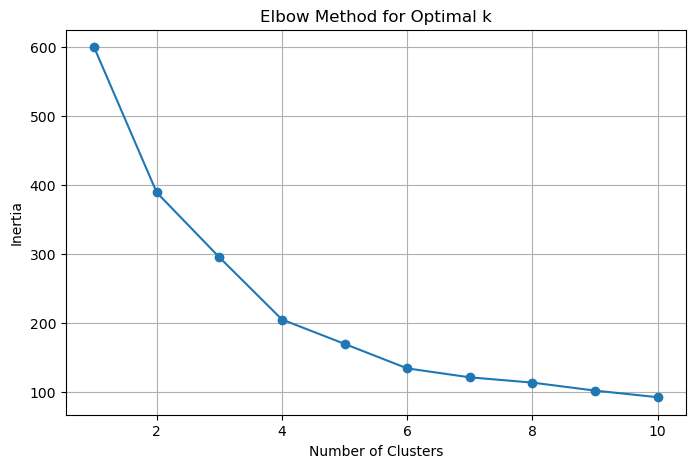

In [8]:
#Step-6: Plot the elbow graph (and Look for a point where the inertia line bends ("elbow") → ideal k.), Helps you pick the best number of clusters.
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [9]:
# Step 7: Apply KMeans with optimal k (say 5) (and This is the main step that assigns each customer to a cluster.)
kmeans = KMeans(n_clusters=5, random_state=42) # Chooses 5 clusters (you could change based on elbow graph).
clusters = kmeans.fit_predict(X_scaled) # fits model and returns cluster labels for each point

# Add cluster column to original data 
df['Cluster'] = clusters # Adds a new column to df indicating each customer's cluster and Useful for analysis or visualization with labels.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


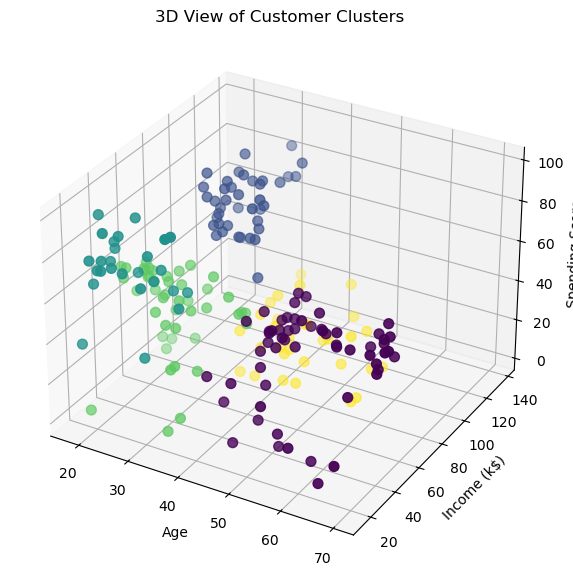

In [10]:
# Step 8: Visualize clusters in original 3D space and which is Helpful for seeing how clusters look in original space (if only 3 features).
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'],
           c=df['Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Income (k$)')
ax.set_zlabel('Spending Score')
plt.title('3D View of Customer Clusters')
plt.show()

In [11]:
# here in this 3D-graph each dot is one customer (x- age, y- annual income and z- spending score), spending score high means they spend more
#Each color represents one cluster (segment) found by KMeans. Clusters group similar customers together based on patterns in age, income, and spending.
# interprate each cluster, what they indicate?
#why 3D plot?
#In 2D (Age vs Income, for example), the separation might not be clear. 
#But adding the Spending Score as the third axis reveals how consumer behavior differs, even if their income/age are similar.

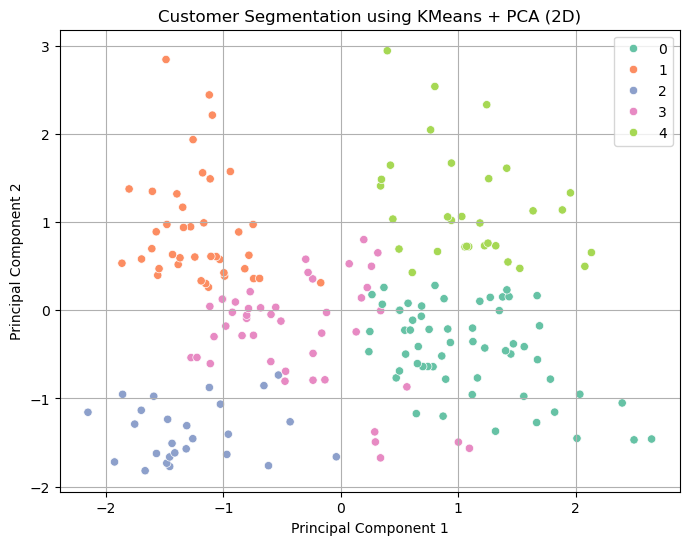

In [12]:
# Step 9: Apply PCA for dimensionality reduction (3D -> 2D) this Reduces data from 3D → 2D (or more if desired).
#Captures maximum variance in fewer dimensions.
#K-Means may work on high dimensions, but we can’t visualize >3D, so PCA helps compress it for visualization.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize PCA result which Plots the 2D version of our data (after PCA).
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2')
plt.title('Customer Segmentation using KMeans + PCA (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show() # You can now visually inspect how well-separated your clusters are


In [13]:
# What happened here in this 2D Graph?
#PCA took your 3 input features:Age,Annual Income (k$),Spending Score (1–100)...and combined them into 2 new features:PC1 and PC2.
# If 3D (or higher-dimension) plots use real features and are more interpretable, then why use PCA at all?
# in 3D hard to visualize beyonf 3D, two features might carry similar info,  high Dimensional model slow down the ML model
#where as PCA speedup computation, noise reduction, avoid overfitting, improves model performance.

In [14]:
#Think of PCA like this:
#Suppose, you’re reading a 100-page book (100 features), but 80 pages repeat the same ideas.
#PCA finds the core 2-3 pages that capture most of the original story, and gives you a summary — faster, smaller, but still rich in content.